## *Submitted by:* - `Sunita Pradhan`

In [2]:
#Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc,RocCurveDisplay
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Crete dataframe of the dataset
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [5]:
#Fatchiing 1st 5 rows of data
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
data.shape

(2111, 17)

In [8]:
#Brief info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [10]:
#Checking for null value counts
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [18]:
#Checking if there any duplicated value
data.duplicated().sum()

24

There is 24 duplicate values.

In [41]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [4]:
# Create a copy of dataframe
df = data.copy()

In [5]:
# Remove duplicates
df_no_duplicates = df.drop_duplicates(inplace=True)

In [22]:
df.duplicated().sum()

0

In [23]:
#Target Feature's unique values
df.NObeyesdad.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [5]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [6]:
#all numerical columns
numerical_col = [fea for fea in df.columns if df[fea].dtype != 'O']
numerical_col

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

### Finding Outliers

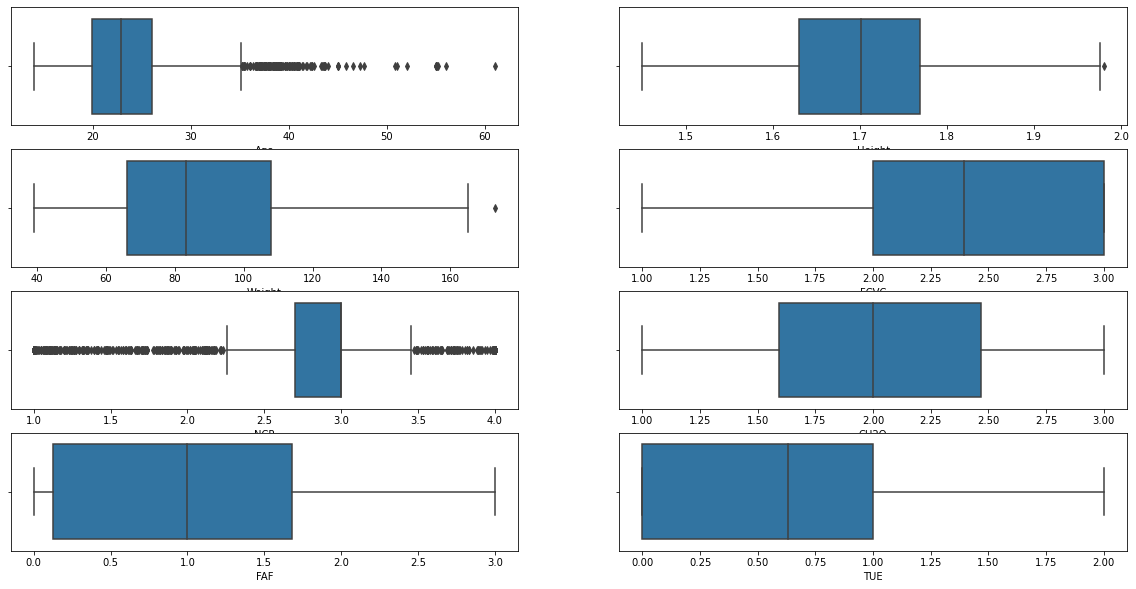

In [7]:
## Plot boxplots for each numerical column

fig = plt.figure(figsize=[20,15])
for i ,col in enumerate(numerical_col):  
    ax1 = fig.add_subplot(4,2, i+1);
    ax1 = sns.boxplot(data = df, x=col)
    
# plt.figure(figsize=(10, 10))
# sns.boxplot(data=df[numerical_col], palette='magma')
# plt.show()

### Handling Outliers

In [7]:
# Calculate IQR for numerical columns
Q1 = df[numerical_col].quantile(0.25)
Q3 = df[numerical_col].quantile(0.75)
IQR = Q3 - Q1

# Remove data points outside the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[~((df[numerical_col] < lower_bound) | (df[numerical_col] > upper_bound)).any(axis=1)]

In [8]:
lower_percentile = 5
upper_percentile = 95

# Calculate lower and upper bounds based on percentiles
lower_bound = df[numerical_col].quantile(lower_percentile / 100)
upper_bound = df[numerical_col].quantile(upper_percentile / 100)

# Replace values below lower percentile with lower bound and values above upper percentile with upper bound
df[numerical_col] = np.where(df[numerical_col] < lower_bound, lower_bound, df[numerical_col])
df[numerical_col] = np.where(df[numerical_col] > upper_bound, upper_bound, df[numerical_col])

#### Exploring Data

<Axes: xlabel='Gender', ylabel='count'>

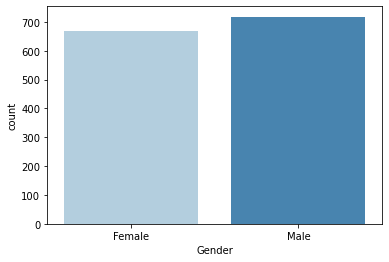

In [14]:
#Analyzing gender column
sns.countplot(data=df, x='Gender', palette='Blues')

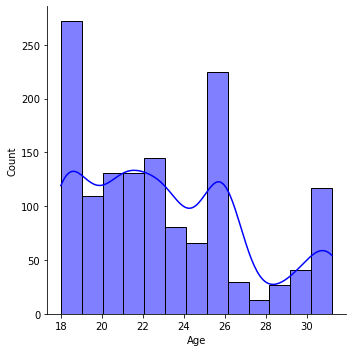

In [25]:
sns.displot(data=df, x='Age',color='blue', kde=True)

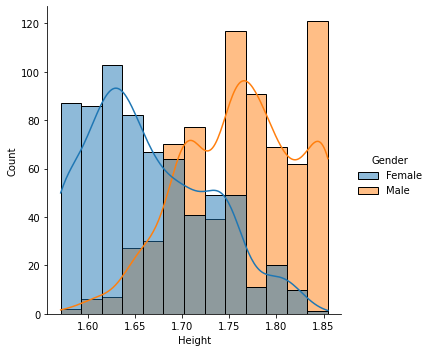

In [23]:
sns.displot(data=df, x='Height', hue='Gender', kde=True)

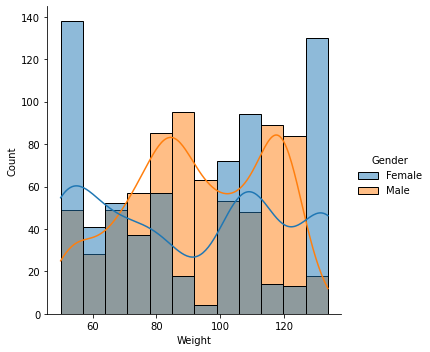

In [29]:
sns.displot(data=df, x='Weight', hue='Gender', kde=True)

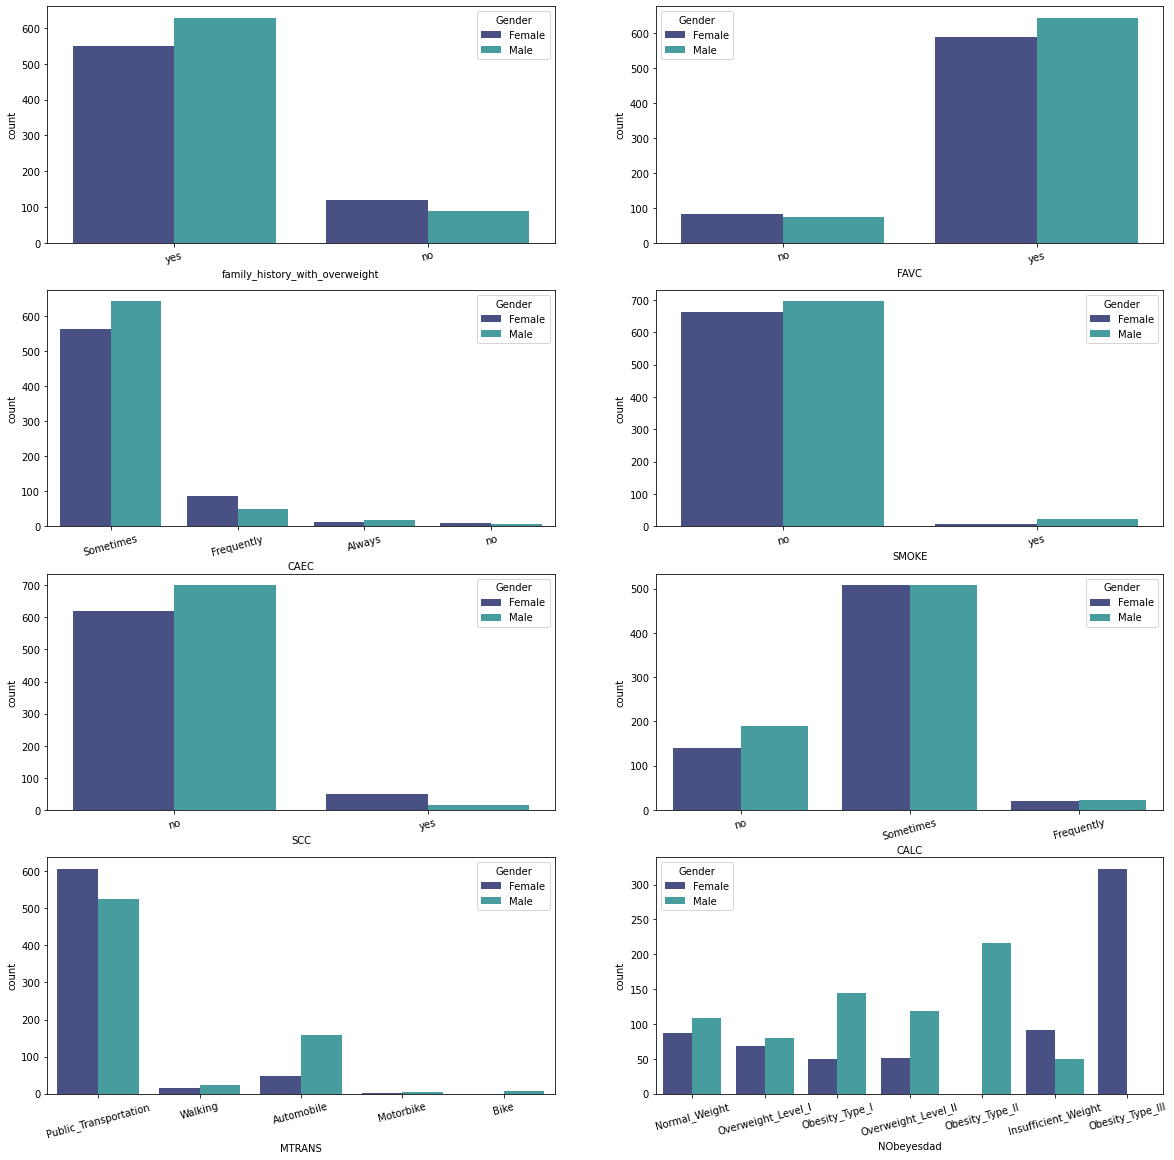

In [53]:
#Visualizing all categorical columns
cat = ['family_history_with_overweight','FAVC', 'CAEC', 'SMOKE','SCC','CALC', 'MTRANS','NObeyesdad']
fig = plt.figure(figsize=[20,20])
for i ,col in enumerate(cat):  
    ax1 = fig.add_subplot(4,2, i+1);
    ax1 = sns.countplot(data = df, x=col, hue='Gender', palette='mako')
    plt.xticks(rotation=15)

In [9]:
#All categorical columns
cat_col = [fea for fea in df.columns if df[fea].dtype == 'O']
cat_col

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [10]:
#Converting all categorical fetures into numerical by labelencoding
from sklearn.preprocessing import LabelEncoder

lblEn = LabelEncoder()

for col in cat_col:
    df[col] = lblEn.fit_transform(df[col])

In [11]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.620000,64.0,1,0,2.0,3.0,2,0,2.0,0,0.000000,1.0,2,3,1
1,0,21.0,1.571395,56.0,1,0,3.0,3.0,2,1,3.0,1,2.716829,0.0,1,3,1
2,1,23.0,1.800000,77.0,1,0,2.0,3.0,2,0,2.0,0,2.000000,1.0,0,3,1
3,1,27.0,1.800000,87.0,0,0,3.0,3.0,2,0,2.0,0,2.000000,0.0,0,4,5
5,1,29.0,1.620000,53.0,0,1,2.0,3.0,2,0,2.0,0,0.000000,0.0,1,0,1


<Axes: >

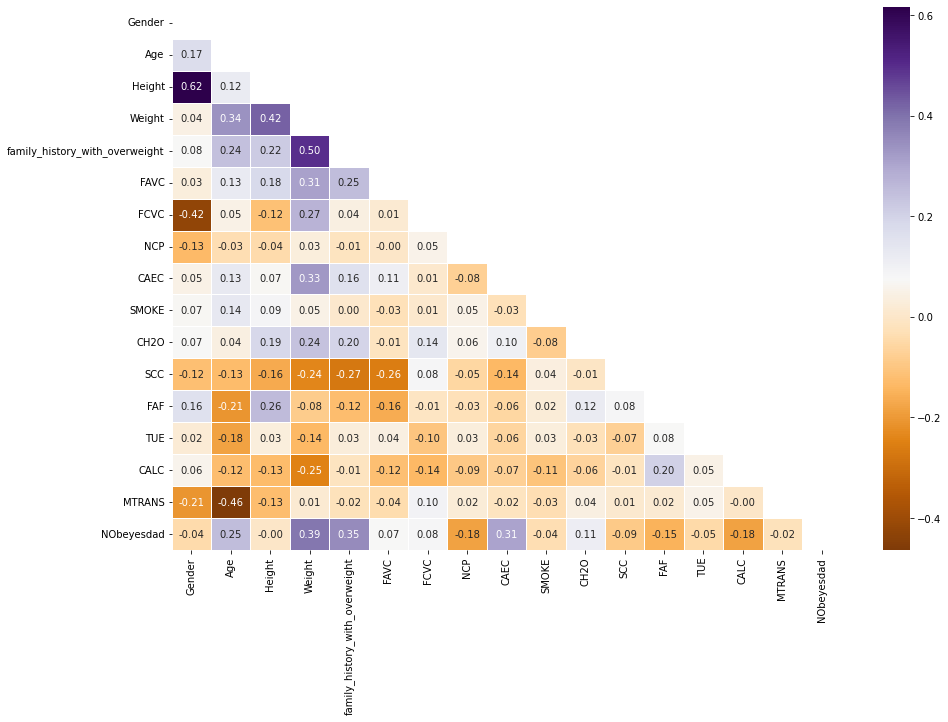

In [14]:
# Correlation Analysis Using Heatmap 

plt.figure(figsize=(15, 10))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),mask= mask, annot=True, fmt='.2f', linewidths=0.5, cmap='PuOr')

In [17]:
# Split the data
X = df[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE','CALC', 'MTRANS']]
y = df[['NObeyesdad']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
#standardize or feature scaling the datasets

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

# for avoiding data leakage here we use transform not fit_transform
X_test = scaler.transform(X_test)

### Logistic Regression

In [28]:
def log_classifier(X_train,X_test,y_train,y_test):
    log_model=LogisticRegression()
    log_model.fit(X_train,y_train)
    log_pred=log_model.predict(X_test)
    cm=confusion_matrix(y_test,log_pred)
    acc = accuracy_score(log_pred,y_test)
    return (f'Accuracy_Score: {acc}\n Train Score: {log_model.score(X_train,y_train)}\n Test Score: {log_model.score(X_test,y_test)}\n Confusion Matrix:\n {cm}')

### SVM

In [30]:
def svm_classifier(X_train,X_test,y_train,y_test):
    classifier_svm=SVC(kernel='rbf',random_state=0)
    classifier_svm.fit(X_train,y_train)
    svm_pred=classifier_svm.predict(X_test)
    cm=confusion_matrix(y_test,svm_pred)
    acc = accuracy_score(svm_pred,y_test)
    return (f'Accuracy_Score: {acc}\n Train Score: {classifier_svm.score(X_train,y_train)}\n Test Score: {classifier_svm.score(X_test,y_test)}\n Confusion Matrix:\n {cm}')

### Decision Tree

In [32]:
def tree_classifier(X_train,X_test,y_train,y_test):
    classifier_tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    classifier_tree.fit(X_train,y_train)
    dt_pred=classifier_tree.predict(X_test)
    cm=confusion_matrix(y_test,dt_pred)
    acc = accuracy_score(dt_pred,y_test)
    return (f'Accuracy_Score: {acc}\n Train Score: {classifier_tree.score(X_train,y_train)}\n Test Score: {classifier_tree.score(X_test,y_test)}\n Confusion Matrix:\n {cm}')

### Random Forest

In [33]:
def forest_classifier(X_train,X_test,y_train,y_test):
    
    # create an instance of a Random Forest classifier
    classifier_forest=RandomForestClassifier(criterion='entropy',random_state=0)
    # training the Random Forest model on the sampled train dataset
    classifier_forest.fit(X_train,y_train)
    # pedicting the labels on the test set
    rf_pred=classifier_forest.predict(X_test)
    cm=confusion_matrix(y_test,rf_pred)
    acc = accuracy_score(rf_pred,y_test)
    #cl_report = classification_report(y_test,rf_pred)
    return (f'Accuracy_Score: {acc}\n Train Score: {classifier_forest.score(X_train,y_train)}\n Test Score: {classifier_forest.score(X_test,y_test)}\n Confusion Matrix:\n {cm}')

In [35]:

def print_score(X_train, X_test, y_train, y_test):
    print("Logitsic Regression:\n")
    result0=log_classifier(X_train, X_test, y_train, y_test)
    print(result0)
    print("-"*100)
    print()
    
    print("SVM:\n")
    result1=svm_classifier(X_train, X_test, y_train, y_test)
    print(result1)
    print("-"*100)
    print()

    print("Decision Tree:\n")
    result4=tree_classifier(X_train, X_test, y_train, y_test)
    print(result4)

    print("-"*100)
    print()

    print("Random Forest:\n")
    result5=forest_classifier(X_train, X_test, y_train, y_test)
    print(result5)
    
print_score(X_train, X_test, y_train, y_test)

Logitsic Regression:

Accuracy_Score: 0.8669064748201439
 Train Score: 0.881981981981982
 Test Score: 0.8669064748201439
 Confusion Matrix:
 [[29  1  0  0  0  0  0]
 [ 2 33  0  0  0  2  0]
 [ 0  0 36  2  0  0  3]
 [ 0  0  1 40  0  0  0]
 [ 0  0  0  0 64  0  0]
 [ 0  2  1  0  0 16  2]
 [ 0  0  6  0  1 14 23]]
----------------------------------------------------------------------------------------------------

SVM:

Accuracy_Score: 0.8489208633093526
 Train Score: 0.9351351351351351
 Test Score: 0.8489208633093526
 Confusion Matrix:
 [[24  5  0  0  0  1  0]
 [ 2 32  0  0  0  1  2]
 [ 0  2 35  1  0  0  3]
 [ 0  0  0 41  0  0  0]
 [ 0  0  0  0 64  0  0]
 [ 0  3  2  0  0 15  1]
 [ 0  4  2  0  0 13 25]]
----------------------------------------------------------------------------------------------------

Decision Tree:

Accuracy_Score: 0.9640287769784173
 Train Score: 1.0
 Test Score: 0.9640287769784173
 Confusion Matrix:
 [[29  1  0  0  0  0  0]
 [ 5 32  0  0  0  0  0]
 [ 0  0 41  0  0  0  0

In [37]:
#From above decision tree algoritm perform well
classifier_tree = DecisionTreeClassifier(criterion = 'entropy')
classifier_tree.fit(X_train,y_train)
dt_pred = classifier_tree.predict(X_test)

In [38]:
## Classification Report (Accuracy, Precision, Recall and F1 Score)

print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91        30
           1       0.89      0.86      0.88        37
           2       1.00      1.00      1.00        41
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        64
           5       0.90      0.86      0.88        21
           6       1.00      0.95      0.98        44

    accuracy                           0.96       278
   macro avg       0.95      0.95      0.95       278
weighted avg       0.96      0.96      0.96       278



In [39]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score (estimator = classifier_tree, X=X_train,y=y_train,cv=10)
print(accuracies.mean())

0.9495495495495495


### Thank you😊